In [141]:
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt
import struct
from scipy.io import wavfile
import os
from sklearn.neural_network import MLPClassifier
import pandas as pd
from scipy.fftpack import fft,fftfreq
from scipy import signal
import math

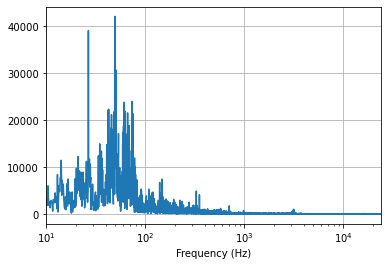

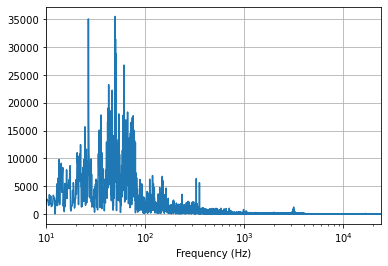

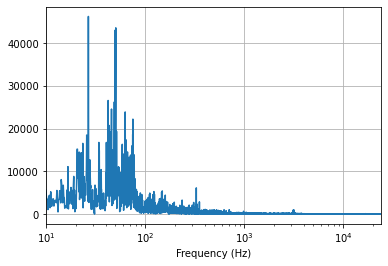

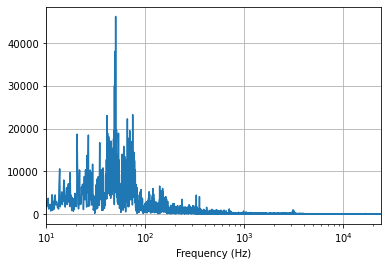

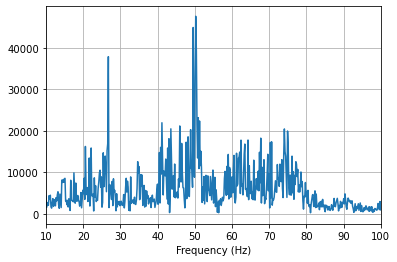

In [37]:
samplerate, data = wavfile.read('./training/training_ambient_noise1.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise2.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise3.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise4.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

samplerate, data = wavfile.read('./training/training_ambient_noise5.wav')
data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 


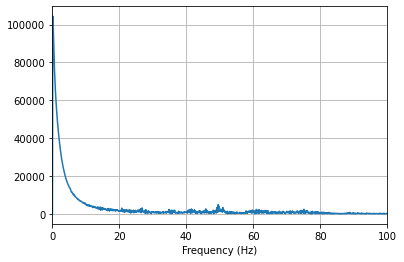

In [55]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')
#data = data[200000:]
data = (data - data.mean()) / data.std()
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [0, 100] )
#plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show() 

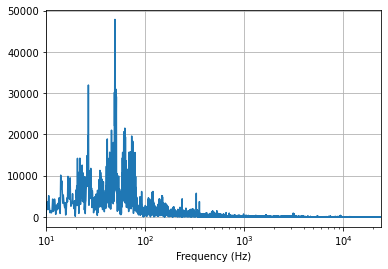

In [142]:

samplerate, data = wavfile.read('./training/training_no_piece5.wav')

data = data[200000:]
data = (data - data.mean()) / data.std()

samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()

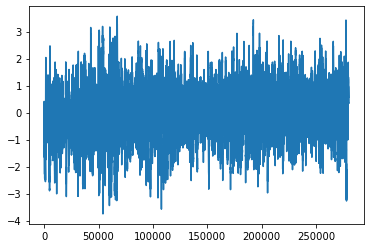

In [143]:
plt.plot(data)

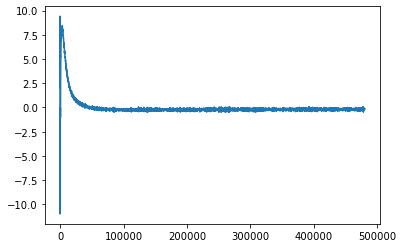

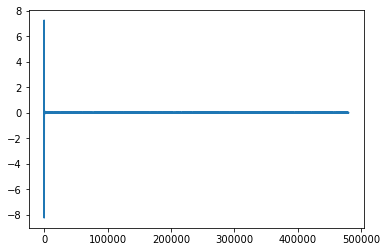

In [168]:
samplerate, data = wavfile.read('./training/training_no_piece5.wav')

#data = data[200000:]
data = (data - data.mean()) / data.std()

plt.plot(data)
plt.show()

sos = signal.butter(70, 55, 'hp', fs=1000, output='sos')
data = signal.sosfilt(sos, data)
plt.plot(data)

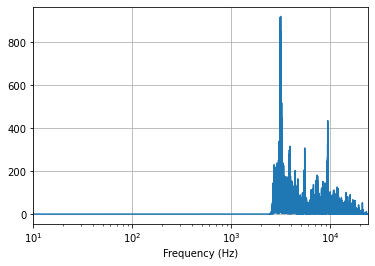

In [159]:
samples = data.shape[0]
datafft = fft(data)
fftabs = abs(datafft)
freqs = fftfreq(samples,1/samplerate)
plt.xlim( [10, samplerate/2] )
plt.xscale( 'log' )
plt.grid( True )
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs[:int(freqs.size/2)],fftabs[:int(freqs.size/2)])
plt.show()